# Pandas Exercise: Time Series (Apple Stock)

### Step 1. Import the necessary libraries

In [17]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple=pd.read_csv("C:\Users\hp\Downloads\AAPL.csv")
apple.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-09,189.500000,190.679993,189.300003,190.580002,190.580002,19756600
1,2018-07-10,190.710007,191.279999,190.179993,190.350006,190.350006,15939100
2,2018-07-11,188.500000,189.779999,187.610001,187.880005,187.880005,18831500
3,2018-07-12,189.529999,191.410004,189.309998,191.029999,191.029999,18041100


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [3]:
apple['Date']=pd.to_datetime(apple['Date'])
apple.head(2)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
Date         23 non-null datetime64[ns]
Open         23 non-null float64
High         23 non-null float64
Low          23 non-null float64
Close        23 non-null float64
Adj Close    23 non-null float64
Volume       23 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.3 KB


### Step 6.  Set the date as the index

In [4]:
apple.set_index('Date').head(4)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-09,189.500000,190.679993,189.300003,190.580002,190.580002,19756600
2018-07-10,190.710007,191.279999,190.179993,190.350006,190.350006,15939100
2018-07-11,188.500000,189.779999,187.610001,187.880005,187.880005,18831500
2018-07-12,189.529999,191.410004,189.309998,191.029999,191.029999,18041100


### Step 7.  Is there any duplicate dates?

In [5]:
#apple[apple.Date.duplicated()]
sum(apple.Date.duplicated())

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [6]:
apple['Date']=apple.Date.sort_values(ascending=False)
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-09,189.500000,190.679993,189.300003,190.580002,190.580002,19756600
1,2018-07-10,190.710007,191.279999,190.179993,190.350006,190.350006,15939100
2,2018-07-11,188.500000,189.779999,187.610001,187.880005,187.880005,18831500
3,2018-07-12,189.529999,191.410004,189.309998,191.029999,191.029999,18041100
4,2018-07-13,191.080002,191.839996,190.899994,191.330002,191.330002,12513900
5,2018-07-16,191.520004,192.649994,190.419998,190.910004,190.910004,15043100
6,2018-07-17,189.750000,191.869995,189.199997,191.449997,191.449997,15534500
7,2018-07-18,191.779999,191.800003,189.929993,190.399994,190.399994,16393400
8,2018-07-19,189.690002,192.550003,189.690002,191.880005,191.880005,20286800
9,2018-07-20,191.779999,192.429993,190.169998,191.440002,191.440002,20676200


### Step 9. Get the last business day of each month

In [13]:
#apple.Date.min()
pd.date_range(apple.Date.min(),apple.Date.max(),freq='BM')

DatetimeIndex(['2018-07-31'], dtype='datetime64[ns]', freq='BM')

### Step 10.  What is the difference in days between the first day and the oldest

In [15]:

apple.Date.max() - apple.Date.min()

Timedelta('30 days 00:00:00')

### Step 11.  How many months in the data we have?

In [20]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

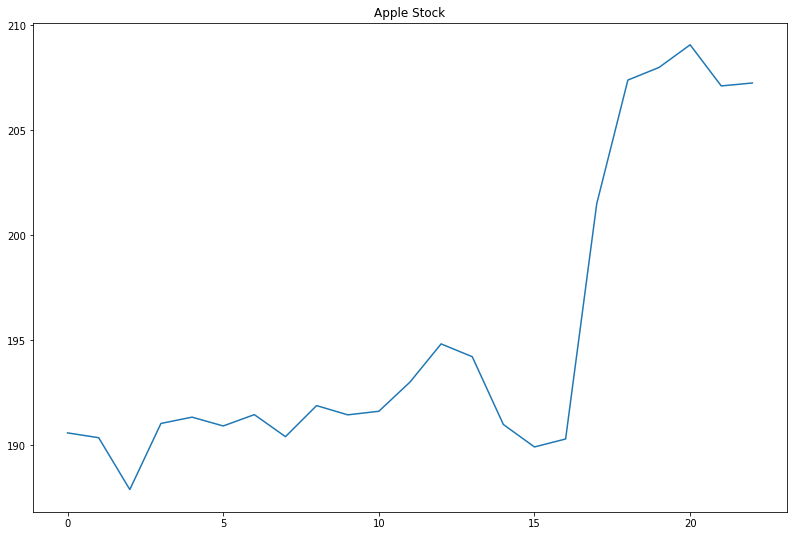

In [18]:
appl = apple['Adj Close'].plot(title = "Apple Stock")
fig = appl.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.